# Análisis y Predicción de Precios de Autos

### Introducción


En este notebook, aplicaremos técnicas de regresión para predecir precios de autos utilizando un dataset detallado.
Realizaremos un análisis exploratorio de datos (EDA) y probaremos tres modelos: **Regresión Lineal**, **K-Nearest Neighbors (KNN)**, y **Árboles de Decisión**.


### Carga y Exploración de Datos

In [9]:

# Cargar el dataset
import pandas as pd
import numpy as np

data = pd.read_csv("Automobile_data.csv")

# Reemplazar valores faltantes representados como '?'
data.replace("?", np.nan, inplace=True)

# Vista general del dataset
print("Primeras filas del dataset:")
display(data.head())

print("Información general del dataset:")
data.info()

print("Resumen estadístico:")
display(data.describe(include='all'))


Primeras filas del dataset:


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Análisis de Valores Nulos y Tratamiento

In [10]:

# Identificar columnas con valores nulos
null_values = data.isnull().sum()
print("Valores nulos por columna:")
print(null_values[null_values > 0])

# Tratamiento: Llenar valores faltantes o eliminarlos (dependiendo del caso)
data["normalized-losses"] = pd.to_numeric(data["normalized-losses"])
data["normalized-losses"].fillna(data["normalized-losses"].mean(), inplace=True)

# Llenar valores faltantes en otras columnas importantes
data["bore"] = pd.to_numeric(data["bore"])
data["stroke"] = pd.to_numeric(data["stroke"])
data["horsepower"] = pd.to_numeric(data["horsepower"])
data["peak-rpm"] = pd.to_numeric(data["peak-rpm"])
data["price"] = pd.to_numeric(data["price"])

columns_to_fill = ["bore", "stroke", "horsepower", "peak-rpm"]
for column in columns_to_fill:
    data[column].fillna(data[column].mean(), inplace=True)

# Eliminar filas donde el precio sea nulo (precio es el target)
data.dropna(subset=["price"], inplace=True)


Valores nulos por columna:
normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_40961/2749373430.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["normalized-losses"].fillna(data["normalized-losses"].mean(), inplace=True)
/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_40961/2749373430.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

### Identificación y Tratamiento de Outliers

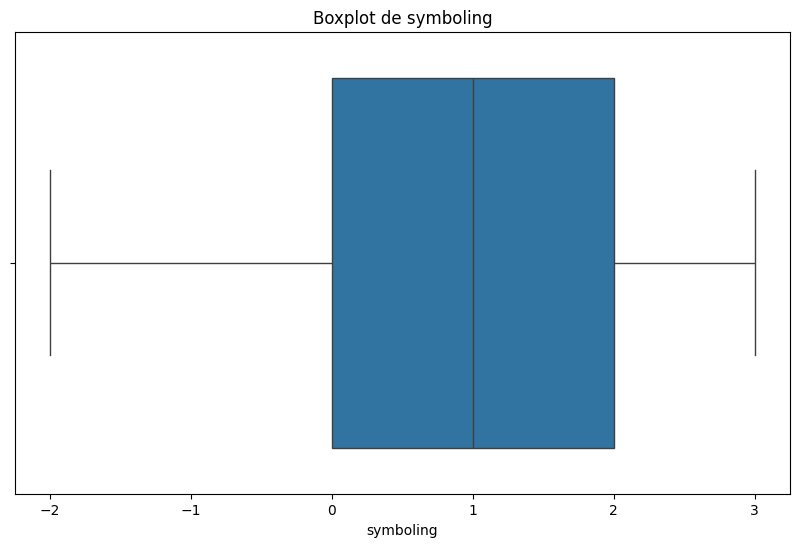

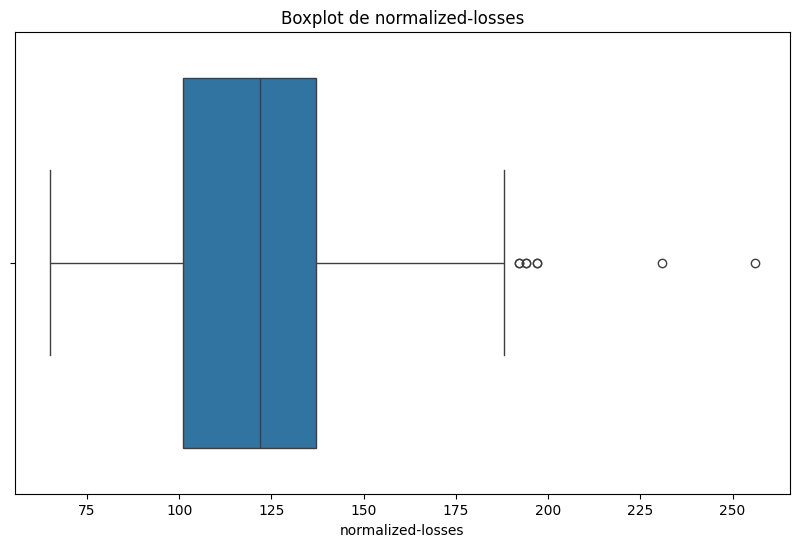

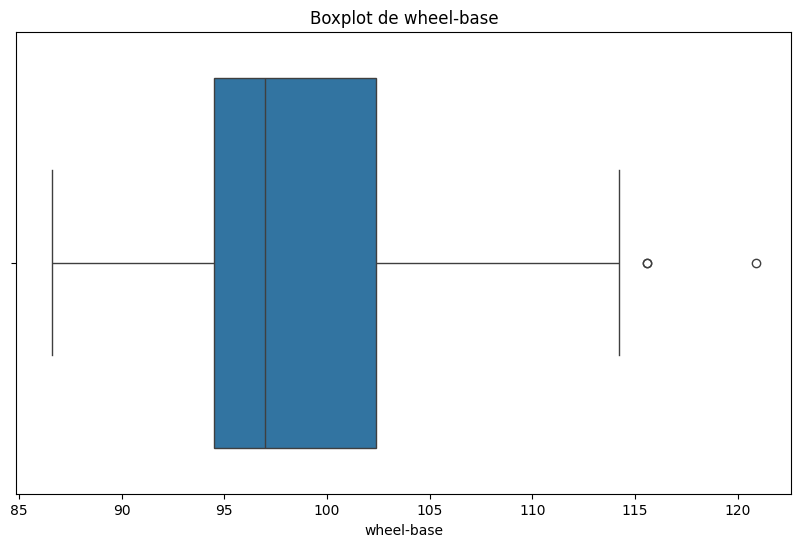

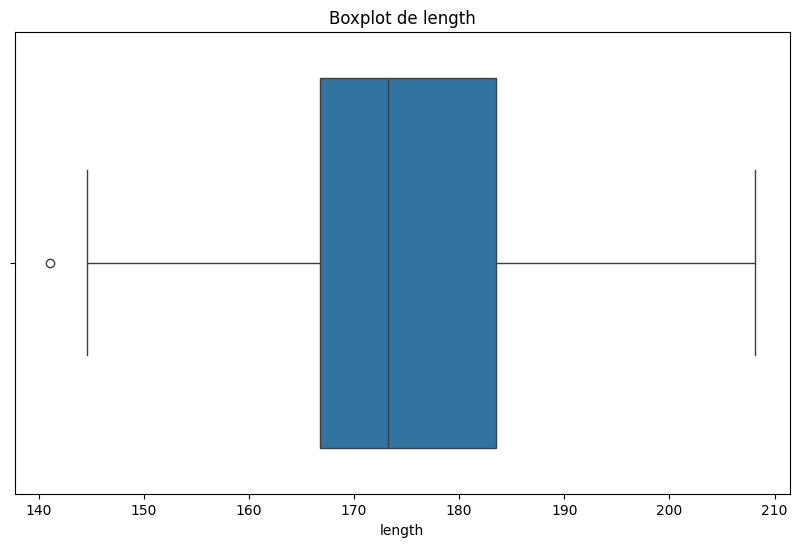

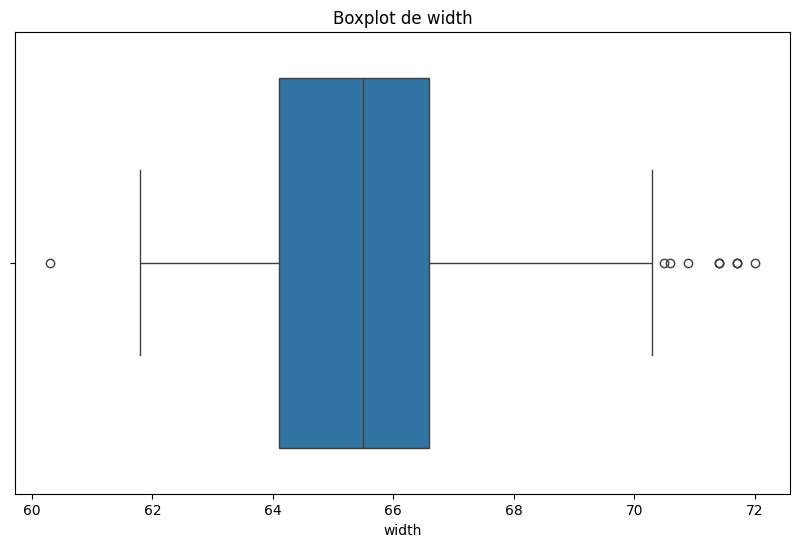

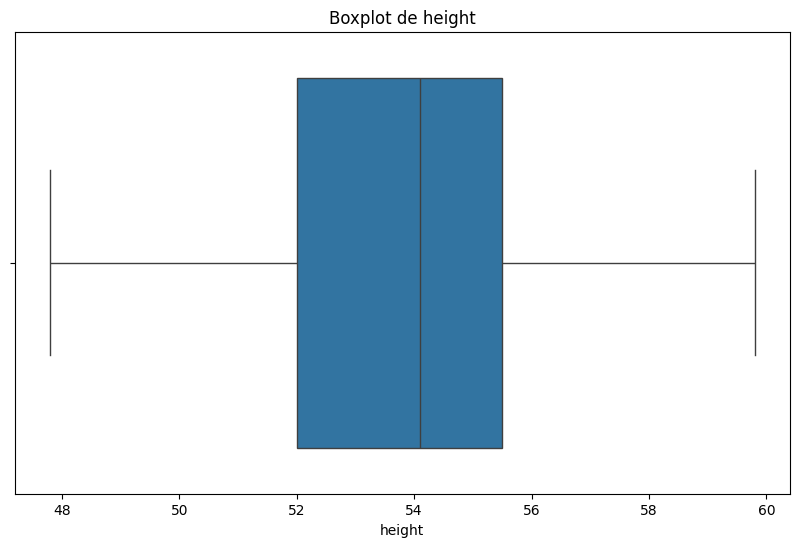

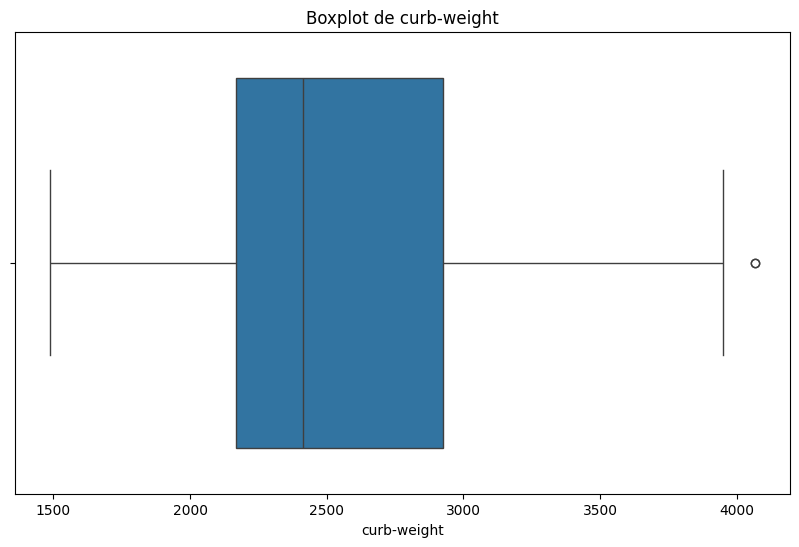

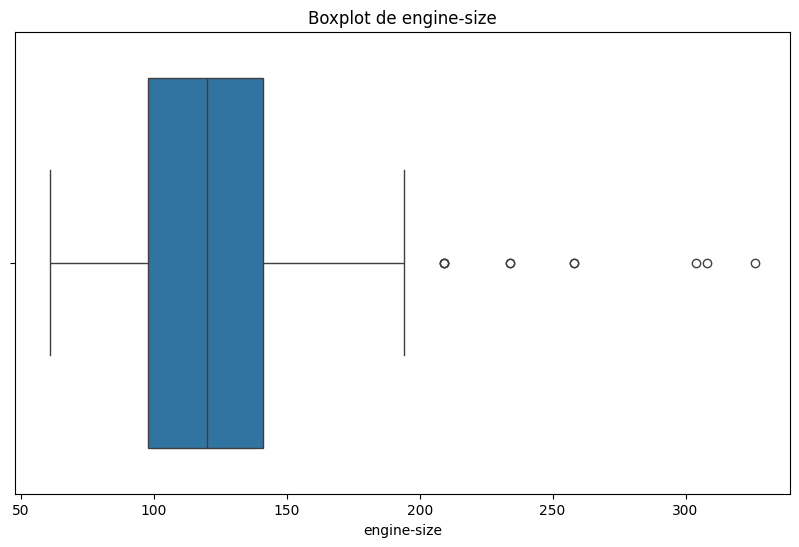

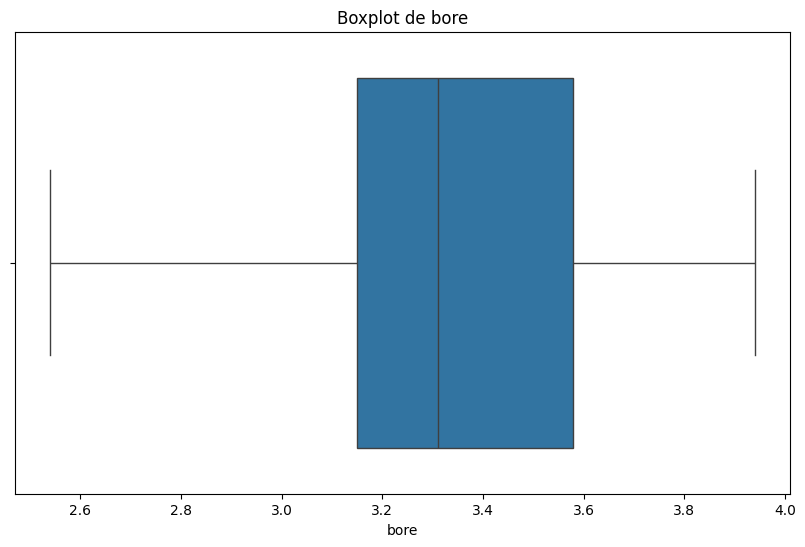

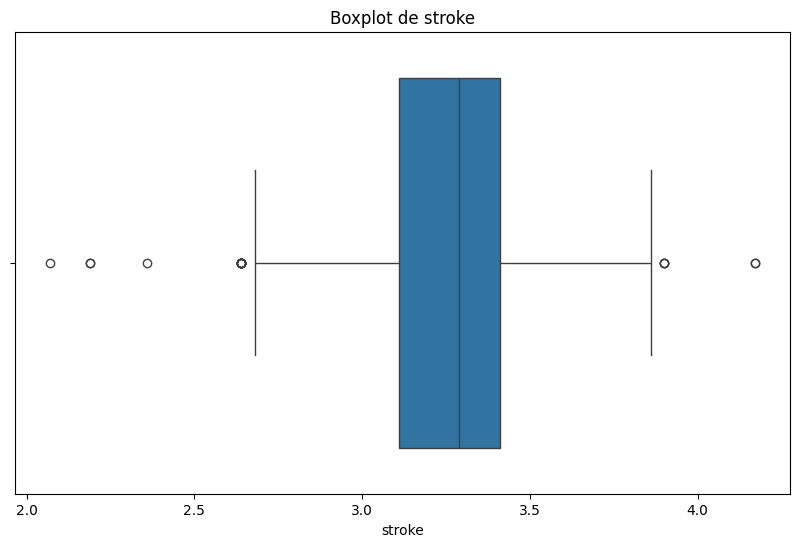

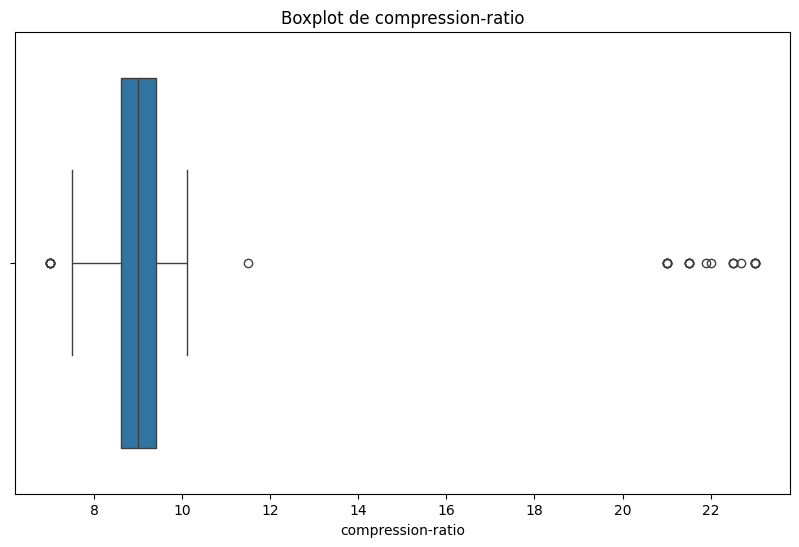

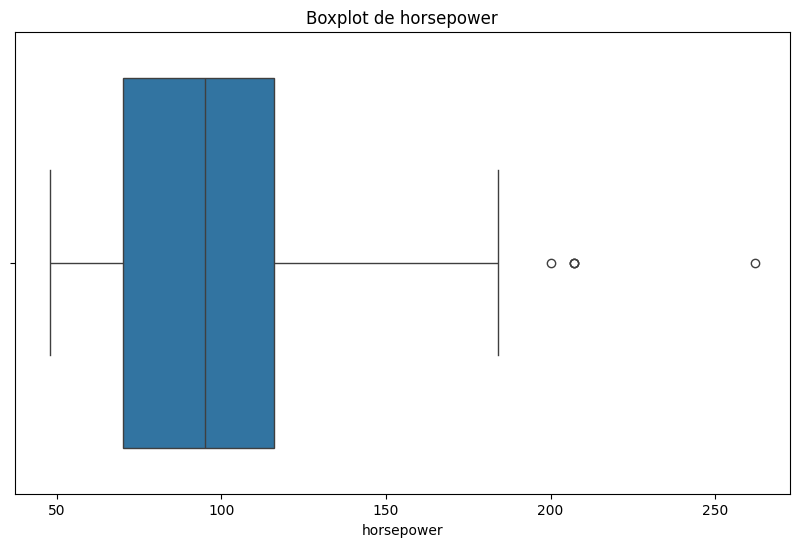

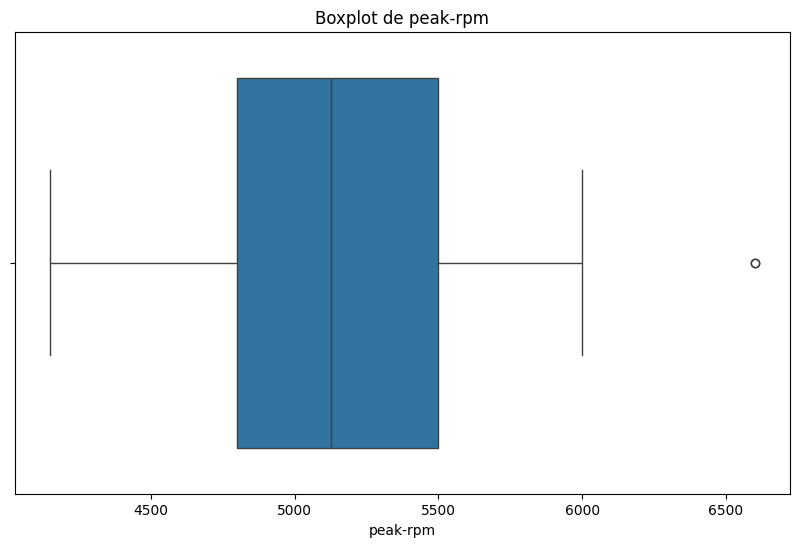

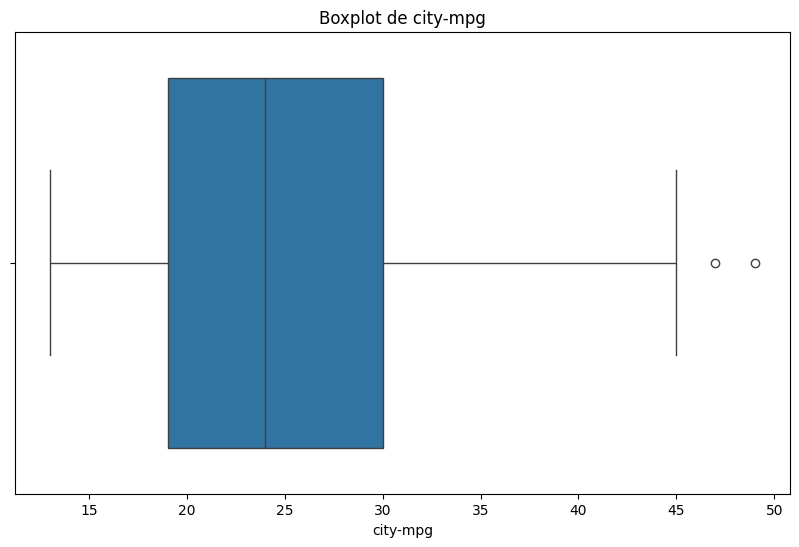

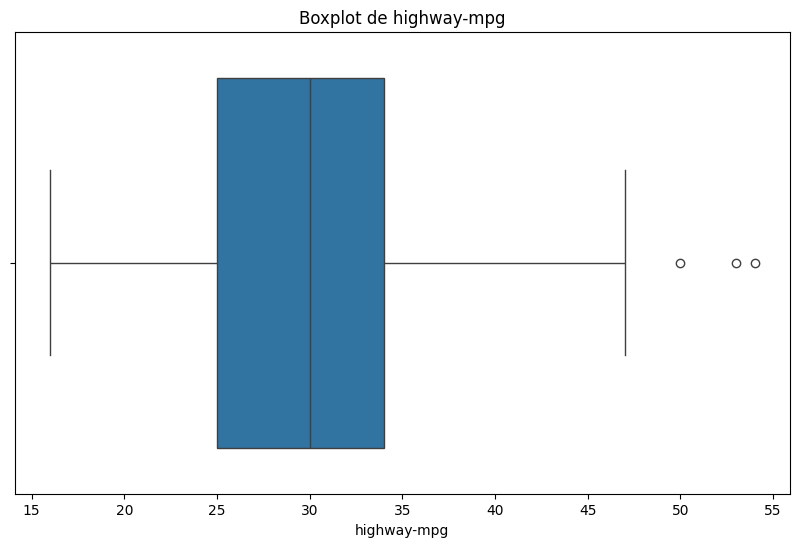

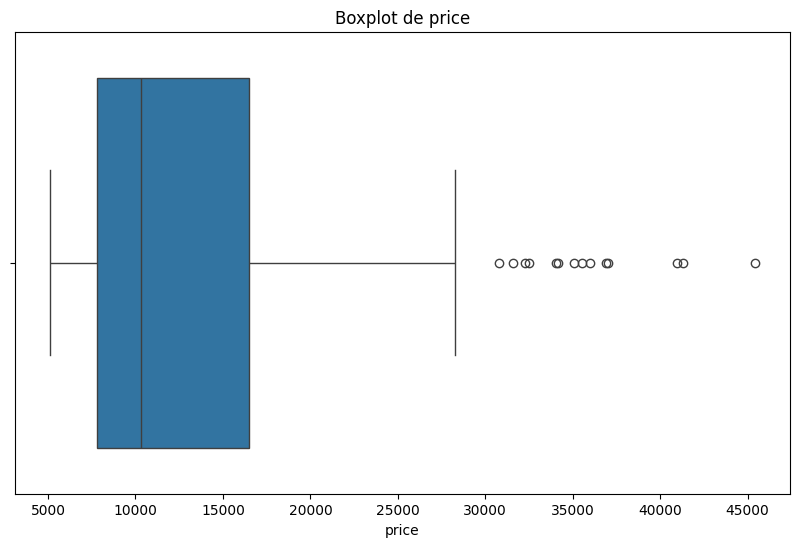

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de outliers usando boxplots
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot de {column}")
    plt.show()


### Análisis de Correlación

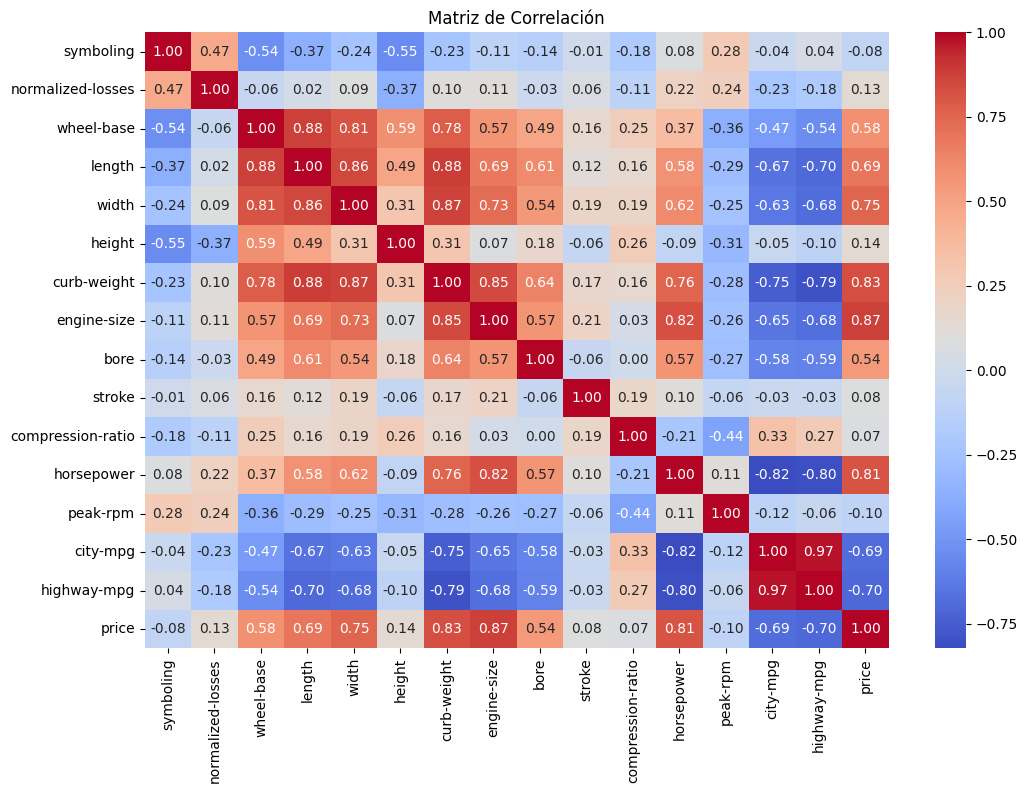

In [12]:

# Mapa de calor de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


### Preparación de Datos

In [13]:

# Variables independientes y dependientes
X = data.drop(["price"], axis=1).select_dtypes(include=["float64", "int64"])
y = data["price"]

# División en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modelos de Regresión

In [14]:

# Entrenar y evaluar Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_lr = linear_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regresión Lineal - MSE: {mse_lr}, R²: {r2_lr}")


Regresión Lineal - MSE: 25684560.54009439, R²: 0.7900675277905751
